# Matplotlib tutorial

### In this tutorial we will be exploring the data visualization library *matplotlib*. This library is great because allows you to quickly and accurately analyze and generate your data and plot the results

### We will also be working with the library *seaborn*, a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

#### In order to enjoy the wonderful features that matplotlib has to offer, we will first import all of the necessary libraries. This includes numpy, pandas, seaborn, and some other features listed that will help us later on. Now that we have created a csv file with only the necessary data on it, we can import in into our Jupyter notebook. 

In [80]:
#import necessary libraries
import numpy as np 
import os
import pandas as pd 
import matplotlib.dates as dates

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

from datetime import datetime, timedelta
from pytz import timezone
import pytz
import boto3 


#### Before we start coding in the Jupyter notebook, we must aquire the correct data to work with.  We will access our desired data by pulling out the 'matplotlib.csv' file from the data-science-tutorials folder in S3 on AWS. 


In [81]:
bucket = 'data-science-tutorials'
key = 'matplotlib.csv'

s3 = boto3.resource('s3')

s3.Bucket(bucket).download_file(key,key)

train = pd.read_csv('./matplotlib.csv')



#### Printing out the data, we can see what the variables look like. For example, we can see that the *time* variable includes the date and time attatched to eachother. Therefore, it makes sense to have two separate variables for date and time.

In [82]:
train.head()

,Unnamed: 0,day_of_week,time,dnis
0,0,Monday,2018-07-30T11:19:51,7734538336
1,1,Friday,2018-07-27T12:58:30,7732507028
2,2,Monday,2018-07-23T22:51:04,8772955100
3,3,Tuesday,2018-07-24T14:15:09,8772955100
4,4,Thursday,2018-07-26T14:58:39,7732507028


#### We can first create the date variable by mapping the first 11 characters of time into a new dataframe called *date*. We can then create the *time* variable by mapping all of the characters after the 11th character into the time dataframe. Printing out the data, we should now see two separate colunms for *date* and *time* with correctly distrbuted data

In [83]:
#Create a new column 'date' using the first 10 characters of time
#split on T
train['date'] = train['time'].map(lambda x: str(x)[:10])
#adjust the 'time' column by cutting the first 11 characters off of time
train['time'] = train['time'].map(lambda x: str(x)[11:])
train.head()

,Unnamed: 0,day_of_week,time,dnis,date
0,0,Monday,11:19:51,7734538336,2018-07-30
1,1,Friday,12:58:30,7732507028,2018-07-27
2,2,Monday,22:51:04,8772955100,2018-07-23
3,3,Tuesday,14:15:09,8772955100,2018-07-24
4,4,Thursday,14:58:39,7732507028,2018-07-26


####  Next, we can reduce variability in the *time* variable by grouping it into different bins. The easiest way to do this is to bin time by hour. Since the hour is listed as the first two characters of the time variable, we can just map those characters into a new dataframe and call it *hour*.  Lastly, we must change the variable into an integer so when we plot graphs it will plot in increasing order. 

In [84]:
#create a new feature 'hour' that takes the first two characters of time
train['hour'] = train['time'].map(lambda x: str(x)[:2])
train['hour'] = train['hour'].astype(int)
train.head()


,Unnamed: 0,day_of_week,time,dnis,date,hour
0,0,Monday,11:19:51,7734538336,2018-07-30,11
1,1,Friday,12:58:30,7732507028,2018-07-27,12
2,2,Monday,22:51:04,8772955100,2018-07-23,22
3,3,Tuesday,14:15:09,8772955100,2018-07-24,14
4,4,Thursday,14:58:39,7732507028,2018-07-26,14


#### The *day_of_week* variable is a little trickier because it does not clearly map into an integer. However, we want to graph days of the week in order from Monday to Sunday, and we can acheive this by creating a key called 'weekday', in which Monday is assigned to  0, Tuesday to 1, and so on. We can then map this assignment to the day_of_week variable and store it into a dataframe called *weekday*. 

In [85]:
#Create a new variable 'weekday' that assigns each day of the week in day_of_week 
#to a number and map that variable to a dataframe
weekday = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
train['weekday'] = train['day_of_week'].map(weekday)

#### Now we can practice plotting the data. We set the titles, subtitles, and size of the plot. We will make a scatter plot, with the y axis as *weekday*, and the y axis as *hour*. If we were to just plot this, the data would appear correctly but the x axis labels would be listed as numbers 0-6, rather than days of the week. We can fix this by adding and plotting tick labels. 

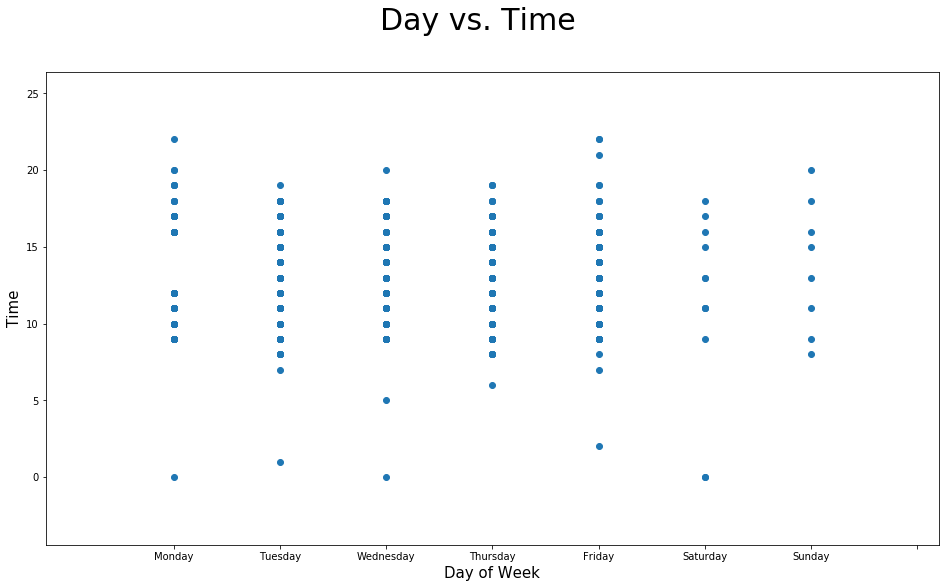

In [86]:
#plot weekday vs. hour
plt.figure(figsize=(16, 9))
plt.suptitle('Day vs. Time', fontsize=30)
plt.xlabel('Day of Week', fontsize=15)
plt.ylabel('Time', fontsize=15)
plt.scatter(train['weekday'], train['hour'])

#add tick labels to weekday so they are days of the week instead of numbers
n = len(train['weekday'])
labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.xticks(range(n), labels)
plt.margins(0.2)
plt.subplots_adjust(bottom=0.15)
plt.show()

#### We can look even more deeply into the *day_of_week* data by creating variables for each separate day of the week. With these varaibles, we can create graphs for each day of the week that graphs the frequency of call per each hour of the day. 

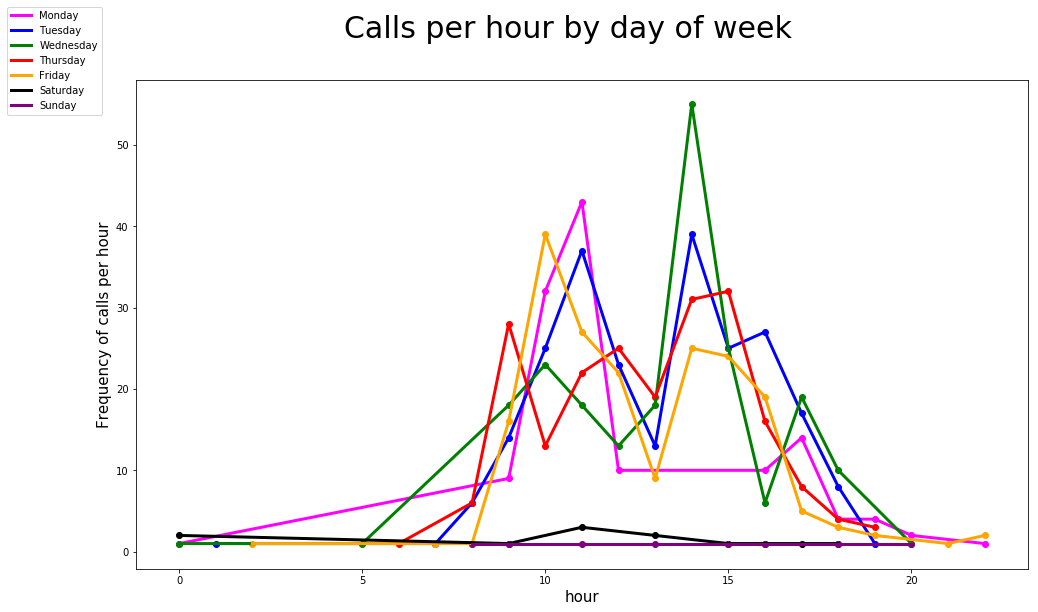

In [87]:
#create sub variables for each day of the week
train_m = train[train.day_of_week=='Monday']
train_t = train[train.day_of_week=='Tuesday']
train_w = train[train.day_of_week=='Wednesday']
train_th = train[train.day_of_week=='Thursday']
train_f = train[train.day_of_week=='Friday']
train_sa = train[train.day_of_week=='Saturday']
train_su = train[train.day_of_week=='Sunday']

day_of_week_sub = [train_m,train_t,train_w,train_th,train_f,train_sa,train_su]
colors = ['magenta', 'blue', 'green', 'red', 'orange', 'black', 'purple']
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

def day_of_week_vs_hour():
    #Configure a calls per hour graph whith all days of the week 
    plt.figure(figsize=(16, 9))
    plt.suptitle('Calls per hour by day of week', fontsize=30)
    plt.xlabel('hour', fontsize=15)
    plt.ylabel('Frequency of calls per hour', fontsize=15)
    for i in range(7):
        values = day_of_week_sub[i]['hour'].value_counts().keys().tolist()
        counts = day_of_week_sub[i]['hour'].value_counts().tolist()
        plt.scatter(values, counts, color = colors[i])
        lists=zip(*sorted(zip(*(values,counts))))
        plt.plot(*lists, linewidth=3.0, label=labels[i], color=colors[i])
        plt.legend(bbox_to_anchor=(0.1, 1),
           bbox_transform=plt.gcf().transFigure)

  
day_of_week_vs_hour()



#### Next, we will create a graph that tell us the frequency of calls per hour regardless of the day of the week. The values and counts allows us to measure the frequency of calls and code at the bottom allows us to connect each of the data points in order from left to right. 

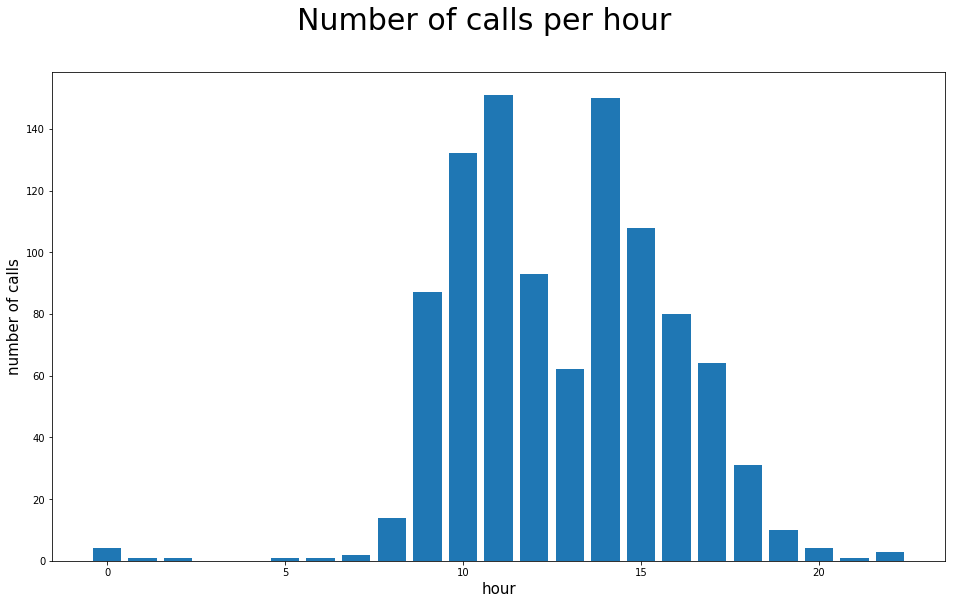

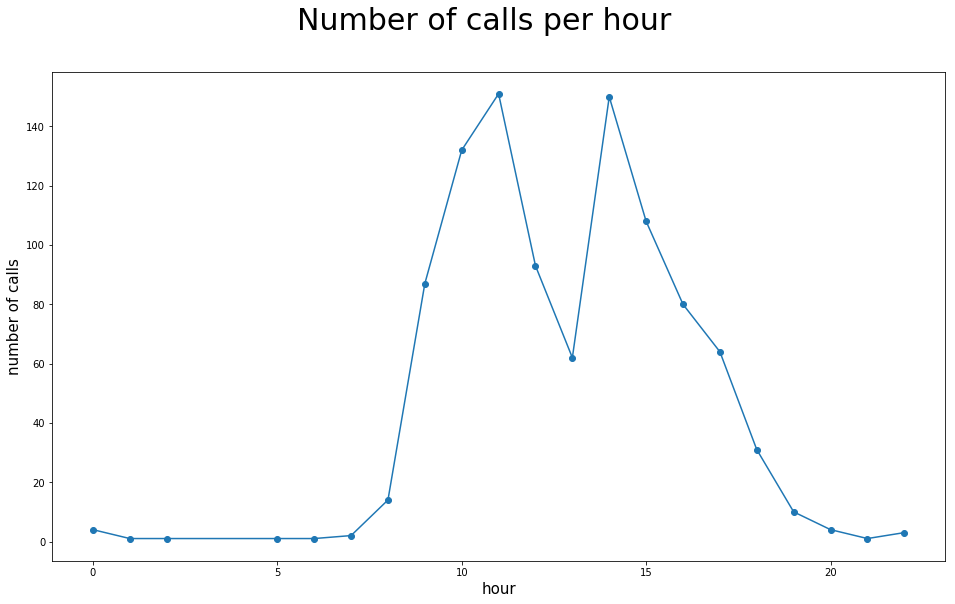

In [88]:
#create variables that count frequency of calls per hour (bar graph)
values = train['hour'].value_counts().keys().tolist()
counts = train['hour'].value_counts().tolist()

#plot number of calls per hour regardless of day of the week (bar graph)
plt.figure(figsize=(16, 9))
plt.suptitle('Number of calls per hour', fontsize=30)
plt.xlabel('hour', fontsize=15)
plt.ylabel('number of calls', fontsize=15)
plt.bar(values,counts)

#create variables that count frequency of calls per hour (line graph)
values = train['hour'].value_counts().keys().tolist()
counts = train['hour'].value_counts().tolist()

#plot number of calls per hour regardless of day of the week (line graph)
plt.figure(figsize=(16, 9))
plt.suptitle('Number of calls per hour', fontsize=30)
plt.xlabel('hour', fontsize=15)
plt.ylabel('number of calls', fontsize=15)
plt.scatter(values,counts)

lists=zip(*sorted(zip(*(values,counts))))
plt.plot(*lists)

#### We can also plot a similar graph the measures the frequency of calls per day of the week regardless of hour. Since we are plotting the variable *weekday* which is listed as numbers, we must add tick labels indicating the day of the week. 

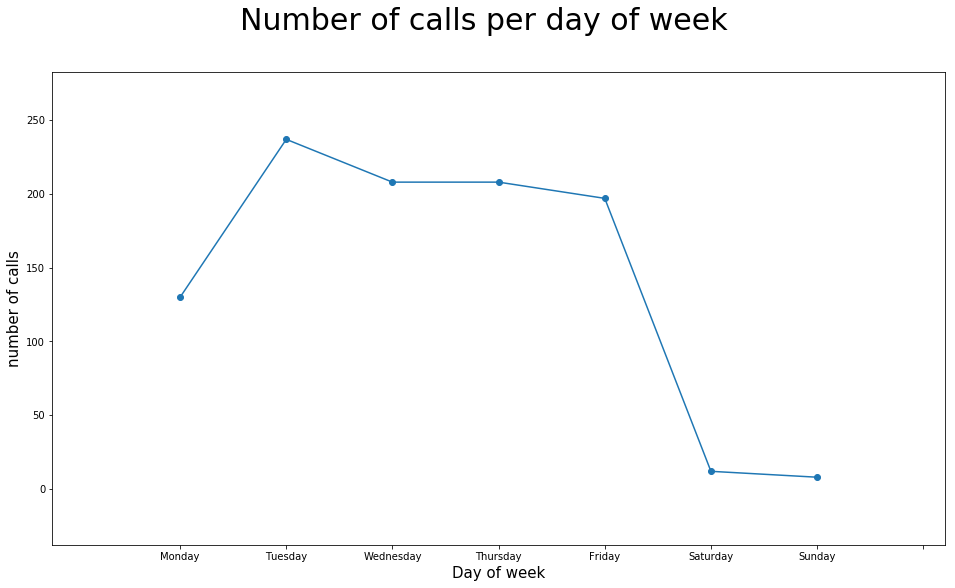

In [89]:
#create variables that count frequency of calls per day of week
values = train['weekday'].value_counts().keys().tolist()
counts = train['weekday'].value_counts().tolist()

#plot number of calls per day of week regardless of hour
plt.figure(figsize=(16, 9))
plt.suptitle('Number of calls per day of week', fontsize=30)
plt.xlabel('Day of week', fontsize=15)
plt.ylabel('number of calls', fontsize=15)
plt.scatter(values,counts)
n = len(train['weekday'])

lists=zip(*sorted(zip(*(values,counts))))
plt.plot(*lists)

labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.xticks(range(n), labels)
plt.margins(0.2)
plt.subplots_adjust(bottom=0.15)
plt.show()

#### Instead of plotting the *day_of_week* vs. *hour*, we will now create a scatterplot the *date* vs. *hour*. Since we want each date to appear in order, we need to change the date from a string to an integer. 

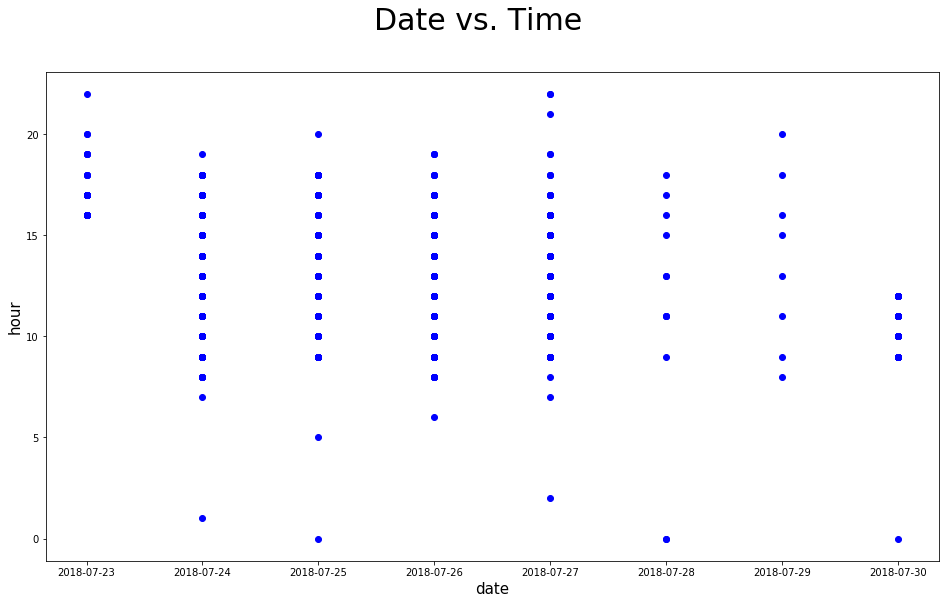

In [90]:
#convert date into an integer
train['date'] = pd.to_datetime(train['date'], errors='coerce')
train['date'] = train['date'].dt.strftime('%Y%m%d')
new_x = dates.datestr2num(train['date'])


#plot date vs. time
plt.figure(figsize=(16, 9))
plt.suptitle('Date vs. Time', fontsize=30)
plt.xlabel('date', fontsize=15)
plt.ylabel('hour', fontsize=15)
plt.plot_date(new_x, train['hour'], fmt="bo", tz=None, xdate=True)

#### Below the heatmap are some density plots. These graphs are similar to ones that we already plotted, except these are more fluid and much easier to create. We can create a density plot with only *hour*, only *day_of_week*, and with both *hour* and *day_of_week*.

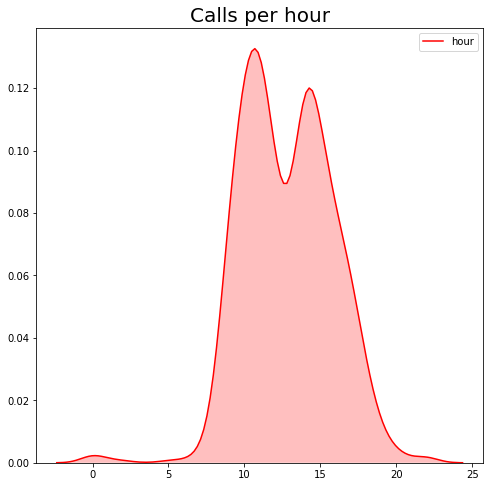

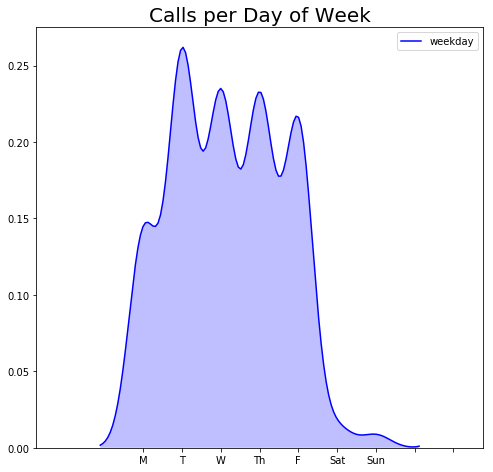

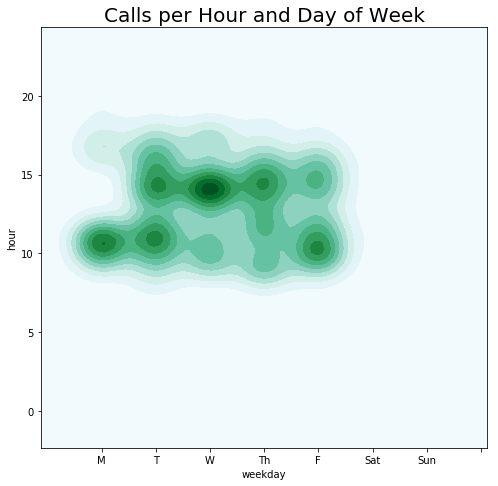

In [91]:
#density plot: hour
plt.figure(figsize = (8,8))
plt.title('Calls per hour', fontsize=20)
ax = sns.kdeplot(train['hour'], shade=True, color="r")

#density plot: day of week
plt.figure(figsize = (8,8))
plt.title('Calls per Day of Week', fontsize=20)
ax = sns.kdeplot(train['weekday'], shade=True, color="b")
labels = ['M','T','W','Th','F','Sat','Sun']
plt.xticks(range(n), labels)
plt.margins(0.2)
plt.subplots_adjust(bottom=0.15)
plt.show()

#density plot: hour vs. day of week
plt.figure(figsize = (8,8))
plt.title('Calls per Hour and Day of Week', fontsize=20)
ax = sns.kdeplot(train['weekday'], train['hour'], shade=True)
labels = ['M','T','W','Th','F','Sat','Sun']
plt.xticks(range(n), labels)
plt.margins(0.2)
plt.subplots_adjust(bottom=0.15)
plt.show()

#### Now we can create a pie chart. We can use value counts to find the frequency of calls for each day of the week. 

[1, 3, 2, 4, 0, 5, 6]


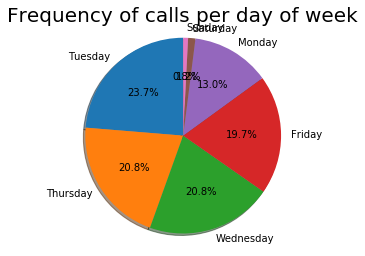

In [92]:
#create variables that count frequency of calls per day of week
counts = train['weekday'].value_counts().keys().tolist()
print(counts)

#provide a mapping to the key above and assign it to 'labels'
weekday = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
labels = list(map(lambda x: weekday[x], counts)) 

#create a pie chart that plots the frequency of calls for each day of the week
sizes = train['weekday'].value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels,autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Frequency of calls per day of week", fontsize="20")
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


#### We can also take a look at the distribution of area codes with the variable *dnis*. Since area codes are only the first 3 numbers of the phone number, we can create a new variable *area_code'* that just takes includes those first 3 numbers. However, we must covert *dnis* to an integer first. We can also find the top 10 most frequent area codes and create a bar graph.

<BarContainer object of 10 artists>

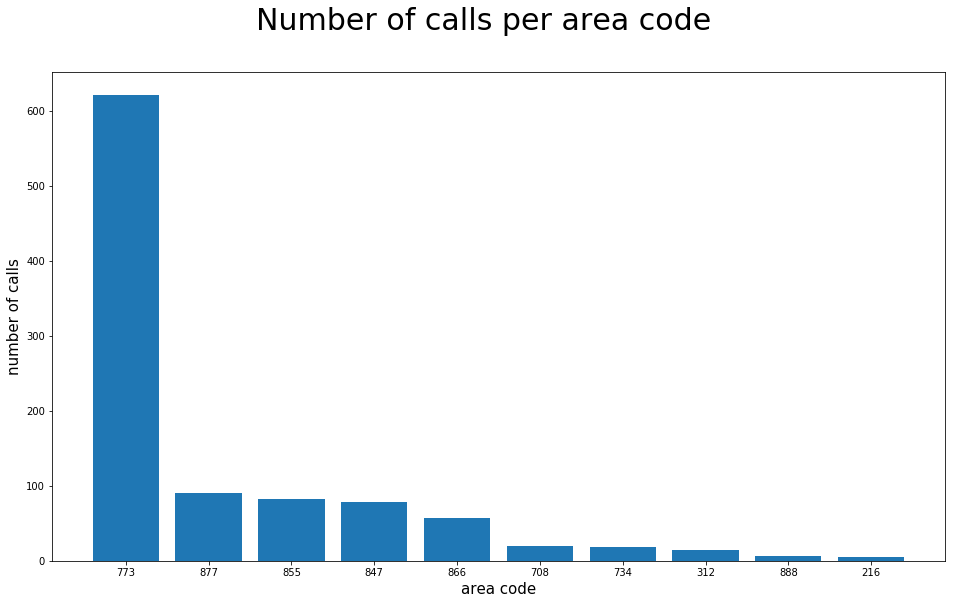

In [93]:
# #change 'dnis' to an int and double check
# train['dnis']=train['dnis'].astype(int)
# print(type(train.at[0,'dnis']))

#create a new variable 'area_code' that takes the first 3 characters of 'dnis'
train['area_code'] = train['dnis'].map(lambda x: str(x)[:3])


#create variables that count frequency of calls per area code
values = train['area_code'].value_counts().keys().tolist()
counts = train['area_code'].value_counts().tolist()

#plot a bar graph with number of calls per hour regardless of day of the week 
#for the top ten area codes
plt.figure(figsize=(16, 9))
plt.suptitle('Number of calls per area code', fontsize=30)
plt.xlabel('area code', fontsize=15)
plt.ylabel('number of calls', fontsize=15)
plt.bar(values[:10],counts[:10])

#### We will now take a closer look at the 5 most frequently called area codes. In order to do this, we will take a similar approach to examining days of the week. We will combine all 5 area codes onto one graph to explore similarities. We will also create 5 density plots for each area code.

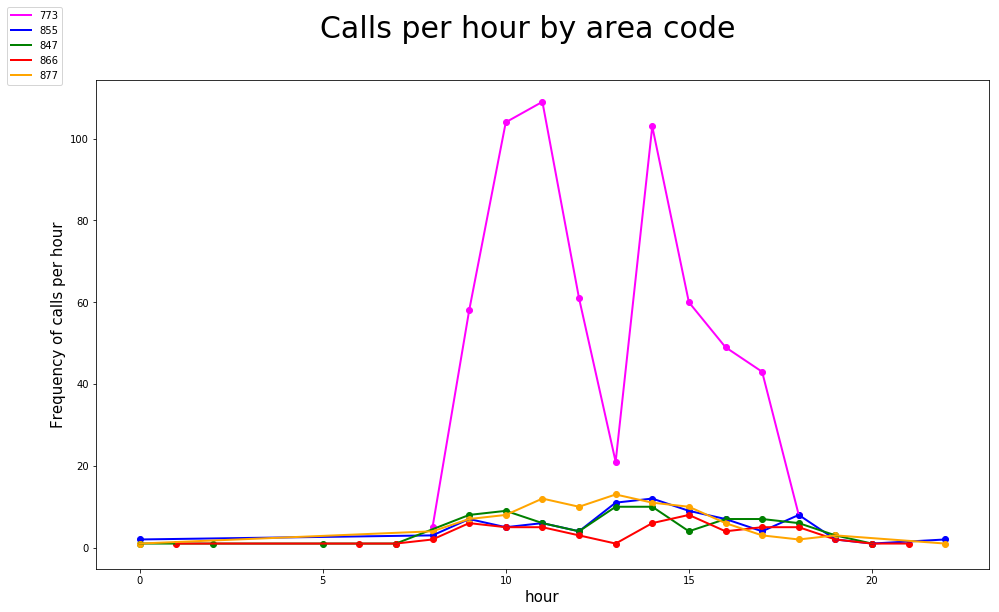

In [94]:
#create sub variables for top 5 area codes
train_773 = train[train.area_code=='773']
train_855 = train[train.area_code=='855']
train_847 = train[train.area_code=='847']
train_866 = train[train.area_code=='866']
train_877 = train[train.area_code=='877']

area_code_sub = [train_773,train_855,train_847,train_866,train_877]
colors = ['magenta', 'blue', 'green', 'red', 'orange']
labels = ['773', '855', '847', '866', '877']


def area_code_vs_hour():
    #Configure a calls per hour graph whith all days of the week 
    plt.figure(figsize=(16, 9))
    plt.suptitle('Calls per hour by area code', fontsize=30)
    plt.xlabel('hour', fontsize=15)
    plt.ylabel('Frequency of calls per hour', fontsize=15)
    for i in range(5):
        values = area_code_sub[i]['hour'].value_counts().keys().tolist()
        counts = area_code_sub[i]['hour'].value_counts().tolist()
        plt.scatter(values, counts, color = colors[i])
        lists=zip(*sorted(zip(*(values,counts))))
        plt.plot(*lists, linewidth=2.0, label=labels[i], color=colors[i])
        plt.legend(bbox_to_anchor=(0.1, 1),
           bbox_transform=plt.gcf().transFigure)

  
area_code_vs_hour()



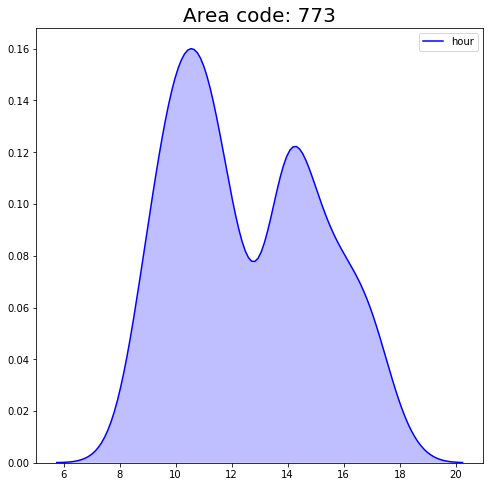

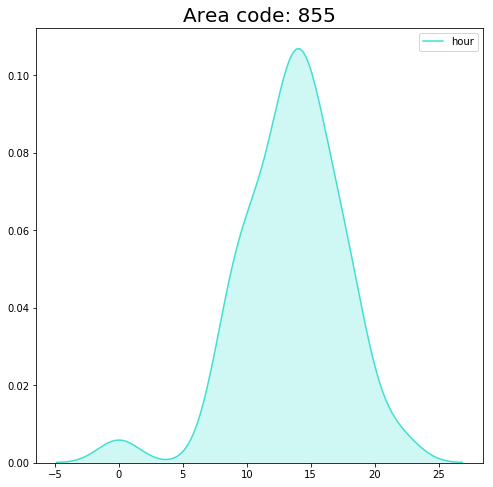

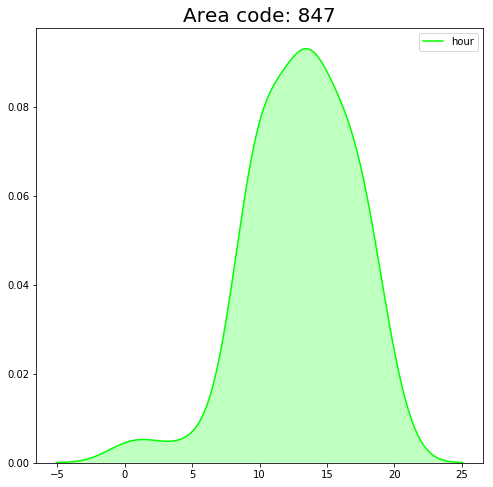

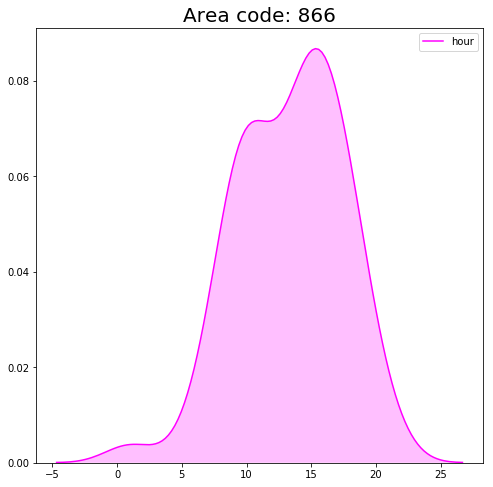

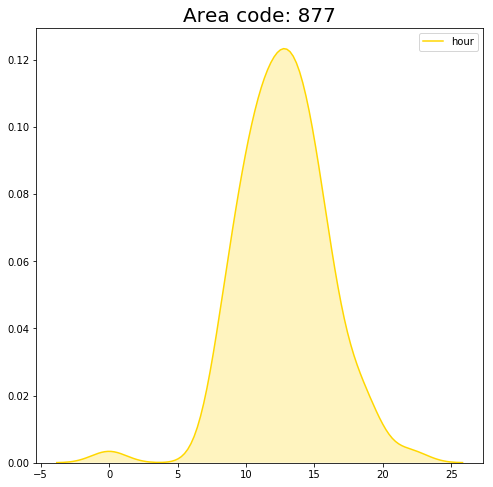

In [95]:
#density plot: area code '733'
plt.figure(figsize = (8,8))
plt.title('Area code: 773', fontsize=20)
ax = sns.kdeplot(train_773['hour'], shade=True, color="blue")

#density plot: area code '855'
plt.figure(figsize = (8,8))
plt.title('Area code: 855', fontsize=20)
ax = sns.kdeplot(train_855['hour'], shade=True, color="turquoise")

#density plot: area code '847'
plt.figure(figsize = (8,8))
plt.title('Area code: 847',fontsize=20)
ax = sns.kdeplot(train_847['hour'], shade=True, color="lime")

#density plot: area code '866'
plt.figure(figsize = (8,8))
plt.title('Area code: 866', fontsize=20)
ax = sns.kdeplot(train_866['hour'], shade=True, color="magenta")

#density plot: area code '877'
plt.figure(figsize = (8,8))
plt.title('Area code: 877', fontsize=20)
ax = sns.kdeplot(train_877['hour'], shade=True, color="gold")



<p>Congrats!! You have just completed this Matplotlib tutorial! &#9786;</p>
Feel free to practice adding your own plots!!